#### [ 합성곱 신경망의 시각화 ]

##### 가중치 시각화  
: 가중치는 입력 이미지의 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 함

In [1]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

2025-11-23 22:17:45.889885: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-23 22:17:45.898187: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-23 22:17:45.999602: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-23 22:17:46.073839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763903866.146559     796 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763903866.17

In [2]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [3]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


numpy() 메서드를 사용해 넘파이 배열로 변환 후 가증치 배열의 평균과  표준편차 넘파이 mean(), std() 메서드로 계산

In [4]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.037520964 0.29517454


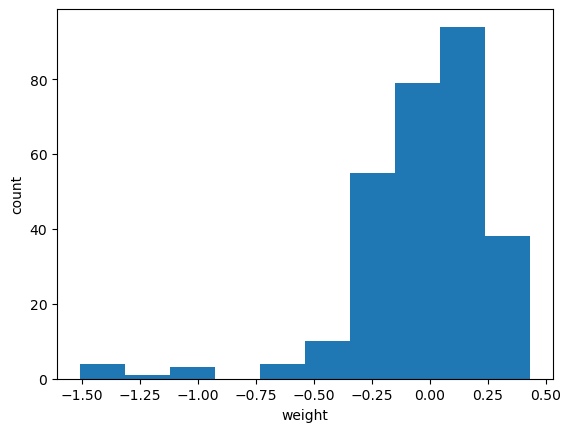

In [5]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

hist() 함수에 히스토그램을 그리기 위해서는 1차원 배열로 전달해야 한다.  
이를 위해 reshape 메서드로 conv_weights 배열을 1개의 열이 있는 배열로 변환

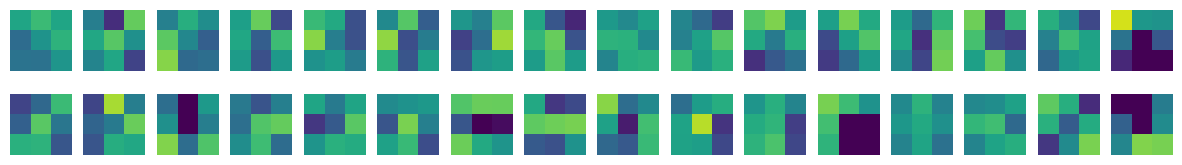

In [6]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [7]:
#훈련하지 않은 빈 합성곱 신경망 만들기

no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                      'relu', padding='same'))

이 모델의 첫 번째 층 (즉 Conv2D 층)의 가중치를 no_training_conv 변수에 저장

In [8]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [9]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.005677435 0.08598601


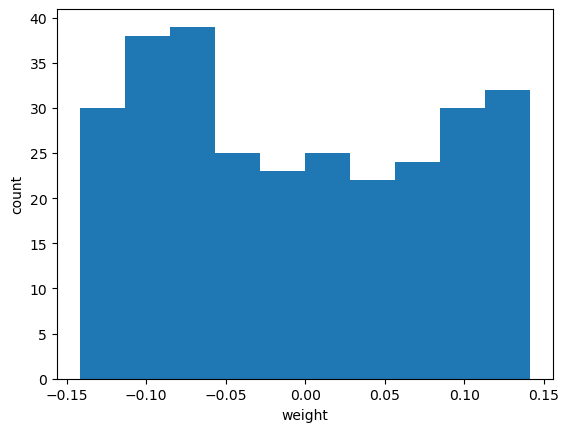

In [10]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

여기서도 마찬가지로 reshape(-1,1)로 히스토그램을 그릴 수 있게 하나의 열로 재정렬

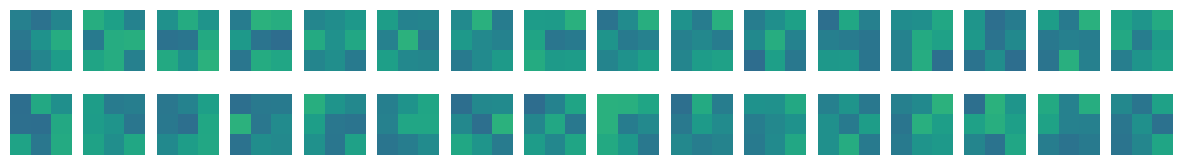

In [14]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5,
                         vmax=0.5)
        axs[i,j].axis('off')
plt.show()

#### [ 함수형 API ]  
: 케라스의 MOodel 클래스르 사용하여 모델을 만든다.

In [15]:
# 입력층과 2개의 Dense층을 만든다.

inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

In [16]:
hidden = dense1(inputs)

In [17]:
# 두 번째 층을 호출

outputs = dense2(hidden)

inputs와 outputs을 Model 클래스로 연결

In [18]:
func_model = keras.Model(inputs, outputs)

model 객체의 predict() 메서드를 호출하면 입력부터 마지막 층까지 모든 계산을 수행한 후 최종 출력을 반환

In [19]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [20]:
# model_inputs의 첫 번째 원소와 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들 수 있음

conv_acti = keras.Model(model.inputs[0], model.layers[0].output)

#### [ 특성 맵 시각화 ]

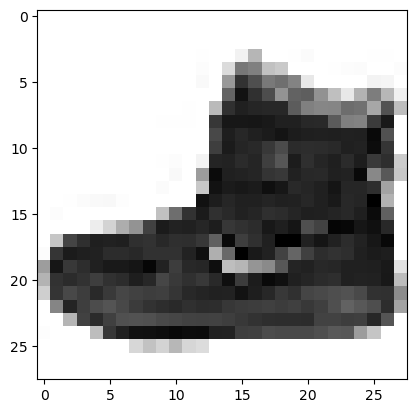

In [21]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것으로 기대  
하나의 샘플을 전달하더라고 꼭 첫 번째 차원을 유지해야 함

In [22]:
ankle_boot = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [23]:
print(feature_maps.shape)

(1, 28, 28, 32)


맷플롯립의 imshow 함수로 이 특성 맵을 그리기  
총 32개의 특성 맵이 있으므로 4개의 행으로 나누어 그림

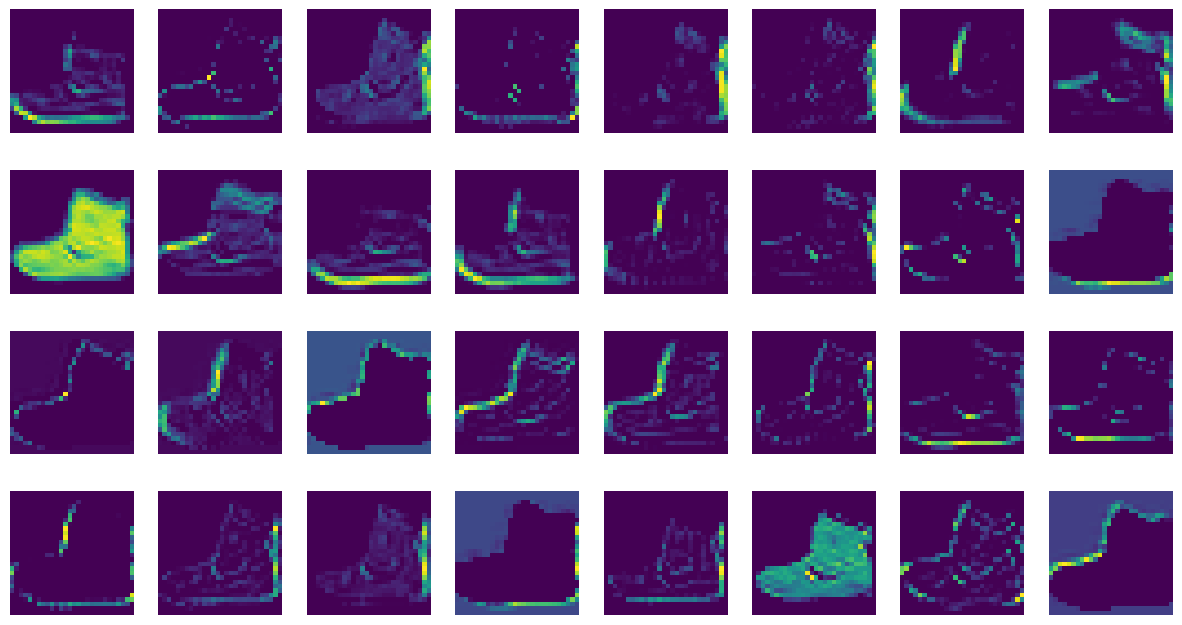

In [25]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [26]:
# 두 번째 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델 만들기

conv2_acti = keras.Model(model.inputs[0], model.layers[2].output)

In [27]:
# 앵클 부츠 샘플을 conv2_acti 모델의 predict()메서드에 전달

feature_maps = conv2_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [28]:
print(feature_maps.shape)

(1, 14, 14, 64)


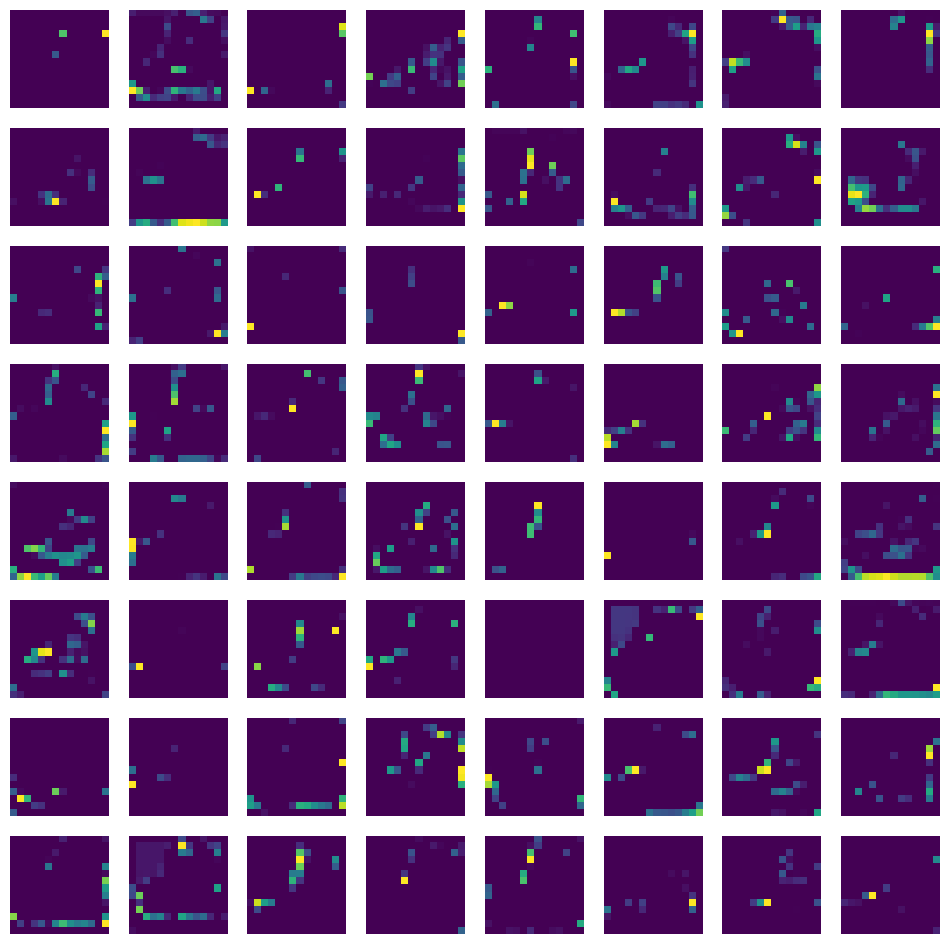

In [29]:
# 64개의 특성 맵을 8개씩 나누어 imshow() 함수로 그리기

fig, axs = plt.subplots(8, 8, figsize = (12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

두 번째 합성곱 층의 필터 크기는 (3,3,32)이다.  
두 번째 합성곱 층의 첫 번째 필터가 앞서 출력한 특성 맵과 곱해져 두 번째 합성곱 층의 첫 번째 특성 맵이 된다.
(14,14,32) 특성 맵에서 어떤 부위를 감지하는지 직관적으로 이해하기 어렵다.  
이런 현상은 합성곱 층을 많이 쌓을 수록 심해진다.